#Dataset Description

\

## The dataset contains information about road traffic accidents with the following columns:

`Time`: Time of the accident

`Day_of_week`: Day of the week when the accident occurred

`Age_band_of_driver`: Age group of the driver

`Sex_of_driver`: Gender of the driver

`Educational_level`: Educational level of the driver

`Vehicle_driver_relation`: Relationship of the driver to the vehicle

`Driving_experience`: Driving experience of the driver

`Type_of_vehicle`: Type of vehicle involved in the accident

`Owner_of_vehicle`: Owner of the vehicle

`Service_year_of_vehicle`: Service years of the vehicle

`Area_accident_occured`: Area where the accident occurred

`Lanes_or_Medians`: Lanes or medians at the accident site

`Road_allignment`: Road alignment at the accident site

`Types_of_Junction`: Type of junction at the accident site

`Road_surface_type`: Type of road surface at the accident site

`Road_surface_conditions`: Road surface conditions at the accident site

`Light_conditions`: Light conditions at the time of the accident

`Weather_conditions`: Weather conditions at the time of the accident

`Type_of_collision`: Type of collision

`Number_of_vehicles_involved`: Number of vehicles involved in the accident

`Number_of_casualties`: Number of casualties in the accident

`Vehicle_movement`: Movement of the vehicle during the accident

`Casualty_class`: Class of casualty (driver, passenger, pedestrian)

`Sex_of_casualty`: Gender of the casualty

`Age_band_of_casualty`: Age group of the casualty

`Casualty_severity`: Severity of the casualty

`Work_of_casuality`: Occupation of the casualty

`Fitness_of_casuality`: Fitness of the casualty

`Pedestrian_movement`: Movement of the pedestrian

`Cause_of_accident`: Cause of the accident

`Accident_severity`: Severity of the accident


# Tasks

##1. Data Cleaning

### Read the dataset

- import libraries and connect to google drive

In [194]:
from google.colab import drive
import pandas as pd
import seaborn as sns

In [195]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [196]:
df = pd.read_csv('/content/drive/MyDrive/Task (1) Dataset.csv')

### Handle Missing Values

- number of instance before handling:

In [197]:
df.shape

(12316, 32)

In [198]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           



1.   Drop columns with more than 900 NaN
2.   Drop columns that contains na value
3.   Drop rows with NaN

now we will not lose our data that much as if we use only dropna function



In [199]:
df=df.drop(df[['Service_year_of_vehicle','Defect_of_vehicle','Work_of_casuality','Fitness_of_casuality','Driving_experience']],axis=1)

In [200]:
df=df.drop(df[['Casualty_class','Sex_of_casualty','Age_band_of_casualty','Casualty_severity']],axis=1)

In [201]:
df=df.dropna()

In [202]:
df.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

- number of instance after handling:

In [203]:
df.shape

(8633, 23)

### Correct any inconsistent data entries.

I did not see any inconsistent yet

### Ensure data types are appropriate for each column.

---



In [204]:
df.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Type_of_vehicle                object
Owner_of_vehicle               object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Pedestrian_movement            object
Cause_of_accident              object
Accident_severity              object
dtype: object

- convert Time column to datetime (hour)

In [205]:
df['Time'] = pd.to_datetime(df['Time'])

<ipython-input-205-1bfd8981fe14>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [206]:
df['Time'] = df['Time'].dt.hour

## 2. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [207]:
df.describe()

,Time,Number_of_vehicles_involved,Number_of_casualties
count,8633.000000,8633.000000,8633.000000
mean,13.794625,2.038920,1.547203
std,5.229653,0.681998,1.015919
min,0.000000,1.000000,1.000000
25%,10.000000,2.000000,1.000000
50%,15.000000,2.000000,1.000000
75%,18.000000,2.000000,2.000000
max,23.000000,7.000000,8.000000


### Identify and analyze patterns in the data.

In [209]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
1,17,Monday,31-50,Male,Junior high school,Employee,Public (> 45 seats),Owner,Office areas,Undivided Two way,...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
3,1,Sunday,18-30,Male,Junior high school,Employee,Public (> 45 seats),Governmental,Office areas,other,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
7,17,Friday,18-30,Male,Junior high school,Employee,Automobile,Governmental,Residential areas,other,...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,U-Turn,Not a Pedestrian,No priority to vehicle,Slight Injury
8,17,Friday,18-30,Male,Junior high school,Employee,Lorry (41?100Q),Owner,Industrial areas,other,...,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,1,Going straight,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17,Friday,18-30,Male,Junior high school,Employee,Automobile,Owner,Residential areas,Undivided Two way,...,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,1,U-Turn,Not a Pedestrian,Moving Backward,Serious Injury


In [210]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
12309,9,Friday,31-50,Female,Elementary school,Employee,Pick up upto 10Q,Owner,School areas,other,...,Wet or damp,Darkness - lights lit,Normal,Collision with roadside objects,2,2,Going straight,Not a Pedestrian,Driving to the left,Slight Injury
12312,18,Sunday,Unknown,Male,Elementary school,Employee,Automobile,Owner,Outside rural areas,Two-way (divided with broken lines road marking),...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,Not a Pedestrian,No distancing,Slight Injury
12313,13,Sunday,Over 51,Male,Junior high school,Employee,Bajaj,Owner,Outside rural areas,Two-way (divided with broken lines road marking),...,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13,Sunday,18-30,Female,Junior high school,Employee,Lorry (41?100Q),Owner,Office areas,Undivided Two way,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13,Sunday,18-30,Male,Junior high school,Employee,Other,Owner,Outside rural areas,Undivided Two way,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Stopping,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8633 entries, 1 to 12315
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         8633 non-null   int32 
 1   Day_of_week                  8633 non-null   object
 2   Age_band_of_driver           8633 non-null   object
 3   Sex_of_driver                8633 non-null   object
 4   Educational_level            8633 non-null   object
 5   Vehicle_driver_relation      8633 non-null   object
 6   Type_of_vehicle              8633 non-null   object
 7   Owner_of_vehicle             8633 non-null   object
 8   Area_accident_occured        8633 non-null   object
 9   Lanes_or_Medians             8633 non-null   object
 10  Road_allignment              8633 non-null   object
 11  Types_of_Junction            8633 non-null   object
 12  Road_surface_type            8633 non-null   object
 13  Road_surface_conditions      8633 non

In [208]:
df[['Number_of_vehicles_involved','Number_of_casualties']].corr()

,Number_of_vehicles_involved,Number_of_casualties
Number_of_vehicles_involved,1.000000,0.223241
Number_of_casualties,0.223241,1.000000


### Visualize the distribution of key variables (e.g., Age_band_of_driver, Type_of_vehicle).

<Axes: xlabel='Number_of_vehicles_involved', ylabel='Count'>

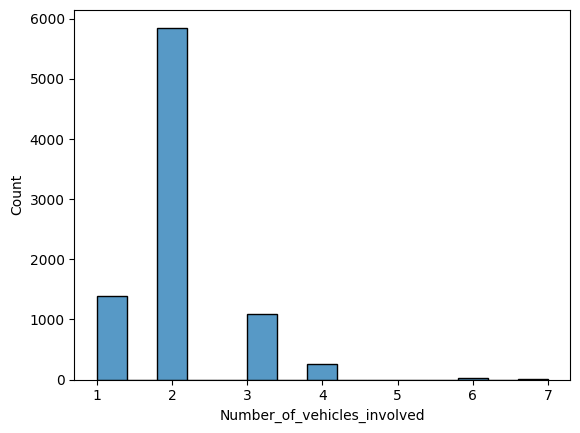

In [175]:
sns.histplot(df['Number_of_vehicles_involved'])

### Explore relationships between variables (e.g., Age_band_of_driver vs. Accident_severity).


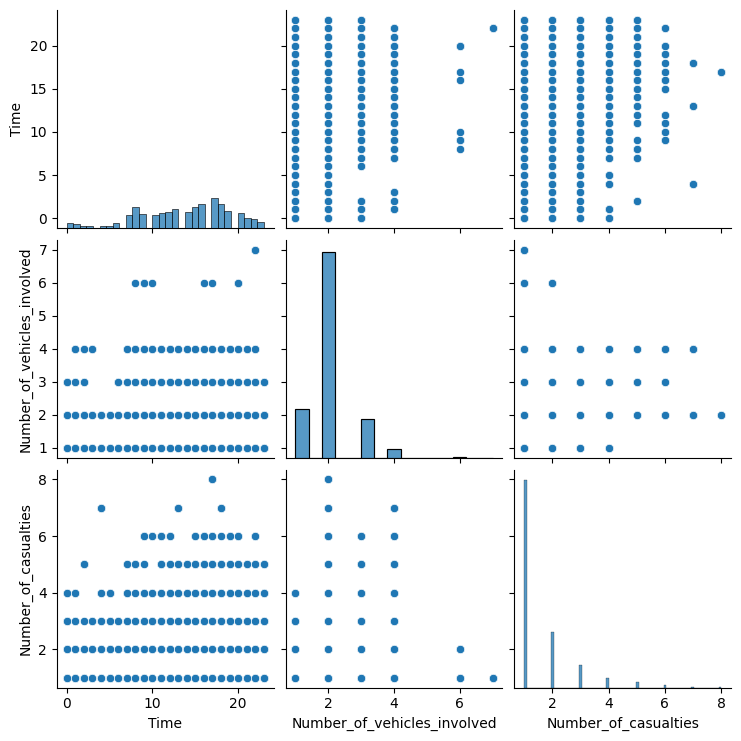

In [179]:
sns.pairplot(df)

## 3. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

<Axes: ylabel='Age_band_of_driver'>

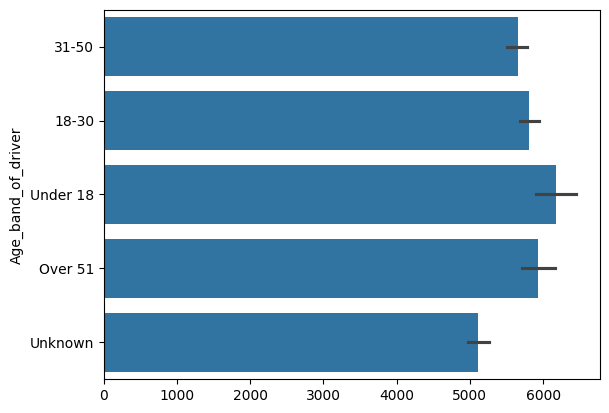

In [167]:
sns.barplot(df['Age_band_of_driver'])

<Axes: ylabel='Vehicle_driver_relation'>

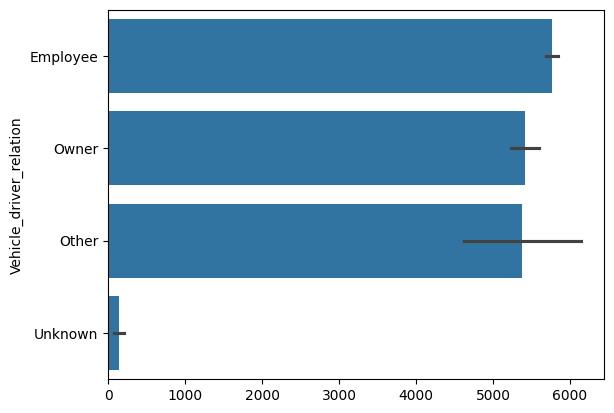

In [176]:
sns.barplot(df['Vehicle_driver_relation'])

<Axes: ylabel='Sex_of_driver'>

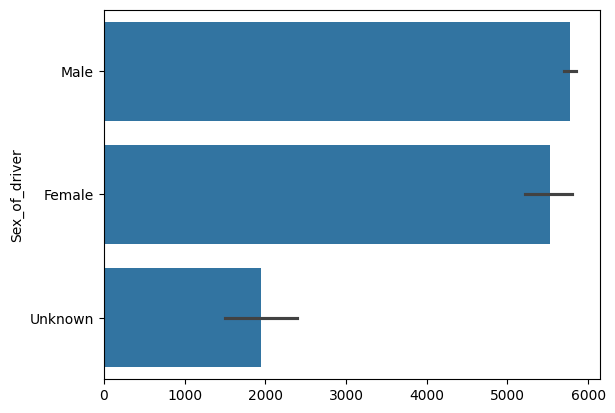

In [169]:
sns.barplot(df['Sex_of_driver'])

<Axes: >

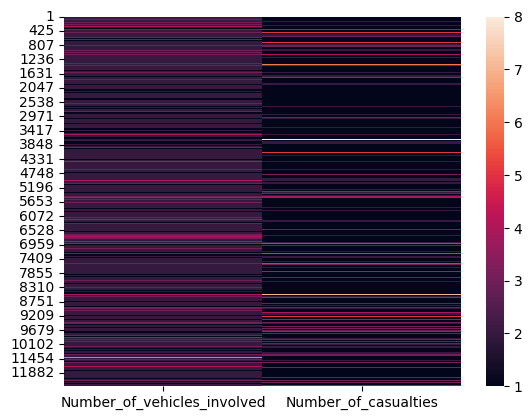

In [218]:
sns.heatmap(df[['Number_of_vehicles_involved','Number_of_casualties']])

## 4. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>

We can conclude that:

1.   Most of the drivers are Male
2.   Most of the drivers are employee
3.   Most of the drivers are under 18
4.   Most of the accident involve 2 cars only
5. Most of the accidents occure at the morning between 2 to 4 AM

